In [2]:
import cv2  #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt  #Matplotlib是RGB

In [8]:
img = cv2.imread('img/cat.jpg')
img_graw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_graw.shape

(414, 500)

In [4]:
def show(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [10]:
show(img)

### HSV
- H - 色调（主波长）。 
- S - 饱和度（纯度/颜色的阴影）。 
- V值（强度）

In [11]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# show()

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转


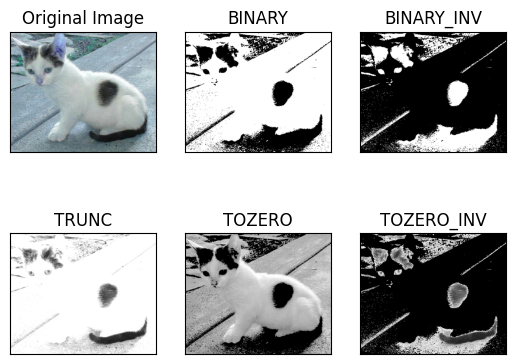

In [12]:
ret, thresh1 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_graw, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### 图像平滑
![title](img/t.png)

In [13]:
img = cv2.imread('img/lenaNoise.png')

In [14]:
show(img)

In [15]:
#均值滤波 简短平均卷积操作
blur=cv2.blur(img,(3,3))
show(blur)

In [16]:
#方框滤波，基本和均值一样，可以归一化
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  
show(box)

In [17]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  
show(box)

In [18]:
#高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian=cv2.GaussianBlur(img,(5,5),1)
show(aussian)

In [19]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波
show(median)

In [20]:
#展示对比
res=np.hstack((blur,aussian,median))
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学 -腐蚀操作

In [21]:
img = cv2.imread('img/dige.png')
show(img)

In [22]:
kernel= np.ones((3,3),np.uint8)

In [23]:
erosion=cv2.erode(img,kernel,iterations=1)
show(erosion)

In [24]:
pie=cv2.imread('img/pie.png')
show(pie)

In [25]:
kernel = np.ones((30,30),np.uint8) 

In [26]:
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
res=np.hstack((erosion_1,erosion_2,erosion_3))
show(res)

### 形态学 膨胀

In [27]:
img = cv2.imread('img/dige.png')
kernel= np.ones((3,3),np.uint8)
dige_dilate=cv2.erode(img,kernel,iterations = 1)

dilate=cv2.dilate(dige_dilate,kernel,iterations = 1)
show(dilate)

In [28]:
pie = cv2.imread('img/pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
show(res)

### 开运算与闭运算

In [29]:
#开运算=先腐蚀，再膨胀
img=cv2.imread('img/dige.png')

kernel=np.ones((5,5),np.uint8)
opening=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
show(opening)

In [30]:
#闭运算，先膨胀，再腐蚀
closing=cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
show(closing)

### 梯度运算

In [31]:
# 梯度=膨胀-腐蚀
pie=cv2.imread('img/pie.png')
kernel=np.ones((7,7),np.uint8)
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)
res=np.hstack((dilate,erosion))
show(res)

In [32]:
gradient=cv2.morphologyEx(pie,cv2.MORPH_GRADIENT,kernel)
show(gradient)

### 礼帽与黑帽
- 礼帽 = 原始输入-开运算结果
- 黑帽 = 闭运算-原始输入

In [33]:
#礼帽
img = cv2.imread('img/dige.png')
kernel=np.ones((5,5),np.uint8)
tophat=cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
show(tophat)

In [34]:
#黑帽
img = cv2.imread('img/dige.png')
kernel=np.ones((5,5),np.uint8)
tophat=cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
show(tophat)

### 图像梯度-Sobel算子
![title](img/sobel_1.png)

In [35]:
img = cv2.imread('img/pie.png',cv2.IMREAD_GRAYSCALE)
show(img)

dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度
- cv2.CV_64F 可以表示负数
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小

In [36]:

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
show(sobelx)

In [37]:
#水平方向，右减左 白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值
sobelx = cv2.convertScaleAbs(sobelx)
show(sobelx)

In [38]:
#垂直方向
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)  
show(sobely)

In [39]:
#分别计算完成x和y方向后，再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
show(sobelxy)

In [40]:
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
show(img)

In [41]:
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
show(sobelxy)

In [42]:
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
show(sobelxy)

### 图像梯度-Scharr算子
![title](img/scharr.png)

### 图像梯度-laplacian算子
![title](img/l.png)

In [43]:
#不同算子的差异
img = cv2.imread('img/lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
show(res)

### Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和 方向 arcTan(梯度)。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

#### 1:高斯滤波器
![title](img/canny_1.png)

#### 2:梯度和方向
![title](img/canny_2.png)

#### 3：非极大值抑制
![title](img/canny_3.png)

![title](img/canny_6.png)

#### 4：双阈值检测
![title](img/canny_5.png)

In [44]:
img=cv2.imread("img/lena.jpg",cv2.IMREAD_GRAYSCALE)
v1=cv2.Canny(img,80,150)
v2=cv2.Canny(img,50,100)
res=np.hstack((v1,v2))
show(res)

In [45]:
img=cv2.imread("img/car.png",cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,120,250)
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
show(res)

### 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔
![title](img/Pyramid_1.png)

#### 高斯金字塔 下采样 朝着金字塔塔尖方向 缩小
![title](img/Pyramid_2.png)
#### 高斯金字塔上采样
![title](img/Pyramid_3.png)

In [5]:
img=cv2.imread('img/AM.png')
show(img)

In [6]:
up=cv2.pyrUp(img)
show(up)

In [7]:
down=cv2.pyrDown(img)
show(down)

In [8]:
up_down=cv2.pyrDown(up)
show(up_down)

#### 拉普拉斯金字塔

![title](img/Pyramid_4.png)

In [9]:
down=cv2.pyrDown(img)
down_up=cv2.pyrUp(down)
l_1=img-down_up
show(l_1)

### 图像轮廓

#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

![title](img/chain.png)

为了更高的准确率，使用二值图像。

In [11]:
img=cv2.imread('img/contours.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY) #2值图像，超过127的分为255，否则取0

In [16]:
show(thresh)

In [13]:
ret

127.0

In [23]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) #轮廓列表和层次结构

In [25]:
draw_img=img.copy()
res=cv2.drawContours(draw_img,contours,-1,(0,0,255),1) #-1 全部轮廓，color ，线条粗细
show(res)

### 轮廓特征

In [28]:
cnt=contours[0]
#面积
area=cv2.contourArea(cnt)
#周长 True表示闭合
len=cv2.arcLength(cnt,True)

### 轮廓近似

In [33]:
img=cv2.imread('img/contours2.png')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) #轮廓列表和层次结构
cnt=contours[0]
draw_img=img.copy()
res=cv2.drawContours(draw_img,[cnt],-1,(0,0,255),2)
show(res)

In [36]:
epsilon=0.05*cv2.arcLength(cnt,True) #基于0.05调整轮廓近似度
approx=cv2.approxPolyDP(cnt,epsilon,True)
draw_img=img.copy()
res=cv2.drawContours(draw_img,[approx],-1,[0,0,255],2)
show(res)

### 边界矩形

In [46]:
img=cv2.imread('img/contours.png')
#灰度图
graw=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#二值
ret,thresh=cv2.threshold(graw,127,255,cv2.THRESH_BINARY)
#轮廓
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt=contours[0]
draw_img=img.copy()
#最小外接矩形
x,y,w,h=cv2.boundingRect(cnt)
img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
show(img)

In [48]:
area = cv2.contourArea(cnt)
x,y,w,h=cv2.boundingRect(cnt)
rect_area=w*h
extent=float(area)/rect_area
print(extent)

0.5154317244724715


In [50]:
#外接圆
(x,y),radius=cv2.minEnclosingCircle(cnt)
center=(int(x),int(y))
radius=int(radius)
img=cv2.circle(img,center,radius,(0,255,0,2))
show(img)

### 傅里叶变换
我们生活在时间的世界中，早上7:00起来吃早饭，8:00去挤地铁，9:00开始上班。。。以时间为参照就是时域分析。

但是在频域中一切都是静止的！

https://zhuanlan.zhihu.com/p/19763358


### 傅里叶变换的作用

- 高频：变化剧烈的灰度分量，例如边界

- 低频：变化缓慢的灰度分量，例如一片大海

### 滤波

- 低通滤波器：只保留低频，会使得图像模糊

- 高通滤波器：只保留高频，会使得图像细节增强



- opencv中主要就是cv2.dft()和cv2.idft()，输入图像需要先转换成np.float32 格式。
- 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现。
- cv2.dft()返回的结果是双通道的（实部，虚部），通常还需要转换成图像格式才能展示（0,255）。

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

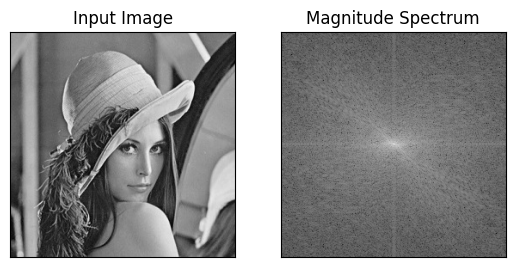

In [52]:
img=cv2.imread('img/lena.jpg',0)
img_flot=np.float32(img)
#进行二维傅立叶变换，指定输出为复数
dft=cv2.dft(img_flot,flags=cv2.DFT_COMPLEX_OUTPUT)
#将低频和高频进行转换
dft_shift=np.fft.fftshift(dft)
#得到回复图表示的形式 公式如下
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [54]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2) #求图片中心
#低通滤波器
mask=np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

#IDFT
fshift=dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back=cv2.idft(f_ishift)
